In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import re

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

# Update with your actual folder names
# (If "abdulhaq1" is the correct name, change it below)
participant_folders = ['processed/abdulhadi1', 'processed/awan1', 'processed/rafay1']  


In [ ]:
def load_participant_data(folder):
    """Load all processed CSV files for a participant."""
    files = glob(os.path.join(folder, '*_processed.csv'))
    df_list = []
    
    for f in files:
        # Filename example: d1_INSIGHT2_260262_2025.01.04T14.23.07+05.00_processed.csv
        filename = os.path.basename(f)
        
        # Label is just the first character (e.g., 'd', 'u', 'r', 'l')
        label = filename[0]
        
        # Extract the trial number from something like "d1" or "d2"
        # If your naming isn’t consistent, adjust this regex
        match = re.search(r'^(\D+)(\d+)', filename)
        if not match:
            print(f'not match {filename}')
            # If no match, skip this file or handle differently
            continue
        trial_num = match.group(2)
        
        # Read the CSV
        df = pd.read_csv(f)
        
        # Add columns for label, participant, and trial
        df['Label'] = label
        df['Participant'] = os.path.basename(folder)
        df['Trial'] = int(trial_num)
        
        df_list.append(df)
    print(f'total files for {folder}: {len(df_list)}')
    
    if not df_list:
        return pd.DataFrame()  # Return empty if no files
    
    # Concatenate all data from this participant
    participant_df = pd.concat(df_list, ignore_index=True)
    return participant_df

# Load data from all participants
dfs = []
for folder in participant_folders:
    part_data = load_participant_data(folder)
    dfs.append(part_data)

full_df = pd.concat(dfs, ignore_index=True)

# Remove any duplicate columns if they exist
full_df = full_df.loc[:, ~full_df.columns.duplicated()].copy()

# Strip any stray spaces from column names
full_df.columns = full_df.columns.str.strip()

# Ensure the DataFrame has a consistent index
full_df.reset_index(drop=True, inplace=True)

# Quickly inspect
print("DataFrame shape:", full_df.shape)
print("Columns:", full_df.columns.tolist())
print(full_df[['Participant','Label','Trial']].head(100000))
print(len(full_df.columns.tolist()))

'''The provided code snippet is a function `load_participant_data(folder)` and a subsequent routine to aggregate data from participant-specific folders. Here's a concise description of 
what the code does:

1. **Function `load_participant_data`**: 
   - **Purpose**: To load all processed CSV files for a specific participant from a given folder.
   - **Process**:
     - It uses the `glob` module to find all CSV files in the specified `folder` that have filenames ending with `_processed.csv`.
     - It initializes an empty list `df_list` to store DataFrames.
     - For each found file:
       - Extracts the base filename and deduces the label (first character) and trial number (using regex).
       - If a filename does not match the expected pattern (e.g., no trial number extracted), it skips processing that file.
       - Reads the CSV into a DataFrame, adding metadata columns for 'Label', 'Participant', and 'Trial'.
     - If no DataFrames were created (i.e., no valid files were processed), it returns an empty DataFrame.
     - Otherwise, it concatenates all the DataFrames in `df_list` into a single DataFrame `participant_df` and returns it.

2. **Loading Data for All Participants**:
   - Iterates over a list of folders corresponding to different participants (`participant_folders`).
   - Calls the `load_participant_data` function for each folder, appending the returned DataFrame to a list `dfs`.
   - Concatenates all DataFrames in `dfs` into a single DataFrame `full_df` to aggregate data from all participants.

3. **Post-Processing**:
   - It removes any duplicate column names that may have resulted from concatenation.
   - It uses `str.strip()` to remove any stray spaces from column names.
   - Resets the DataFrame index to ensure a consistent, ordered index starting from zero.

4. **Quick Inspection**:
   - It prints the shape (dimensions) of the combined `full_df`.
   - It prints the names of the columns, providing an overview of the dataset structure.
   - Finally, it prints the first few rows (up to 100,000) of the DataFrame, specifically the columns 'Participant', 'Label', and 'Trial', to give a brief look at the imported data.

This code efficiently organizes the importing, processing, and aggregation of participant-specific EEG data stored as CSV files, making it ready for subsequent analysis and visualization.'''


total files for processed/abdulhadi1: 44
total files for processed/awan1: 44
total files for processed/rafay1: 44
DataFrame shape: (167594, 66)
Columns: ['Timestamp', 'OriginalTimestamp', 'EEG.Counter', 'EEG.Interpolated', 'EEG.AF3', 'EEG.T7', 'EEG.Pz', 'EEG.T8', 'EEG.AF4', 'EEG.RawCq', 'EEG.Battery', 'EEG.BatteryPercent', 'CQ.AF3', 'CQ.T7', 'CQ.Pz', 'CQ.T8', 'CQ.AF4', 'CQ.Overall', 'MOT.CounterMems', 'MOT.InterpolatedMems', 'MOT.Q0', 'MOT.Q1', 'MOT.Q2', 'MOT.Q3', 'MOT.AccX', 'MOT.AccY', 'MOT.AccZ', 'MOT.MagX', 'MOT.MagY', 'MOT.MagZ', 'POW.AF3.Theta', 'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma', 'POW.T7.Theta', 'POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma', 'POW.Pz.Theta', 'POW.Pz.Alpha', 'POW.Pz.BetaL', 'POW.Pz.BetaH', 'POW.Pz.Gamma', 'POW.T8.Theta', 'POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH', 'POW.T8.Gamma', 'POW.AF4.Theta', 'POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH', 'POW.AF4.Gamma', 'EQ.SampleRateQuality', 'EQ.OVERALL', 'EQ.AF3', '

"The provided code snippet is a function `load_participant_data(folder)` and a subsequent routine to aggregate data from participant-specific folders. Here's a concise description of \nwhat the code does:\n\n1. **Function `load_participant_data`**: \n   - **Purpose**: To load all processed CSV files for a specific participant from a given folder.\n   - **Process**:\n     - It uses the `glob` module to find all CSV files in the specified `folder` that have filenames ending with `_processed.csv`.\n     - It initializes an empty list `df_list` to store DataFrames.\n     - For each found file:\n       - Extracts the base filename and deduces the label (first character) and trial number (using regex).\n       - If a filename does not match the expected pattern (e.g., no trial number extracted), it skips processing that file.\n       - Reads the CSV into a DataFrame, adding metadata columns for 'Label', 'Participant', and 'Trial'.\n     - If no DataFrames were created (i.e., no valid files w

Trial Distribution:
 Label         d   l   r   u
Participant                
abdulhadi1   11  11  11  11
awan1        11  11  11  11
rafay1       11  11  11  11


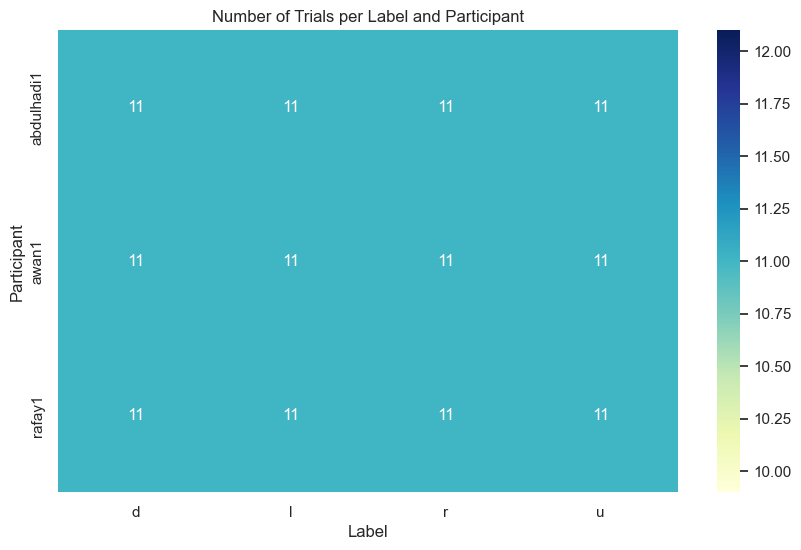

"### Purpose:\nThe code aims to visualize the **number of unique trials** for each combination of **participant** and **label** (e.g., 'd', 'u' 'r', 'l') in your dataset. \n\n### Step-by-Step Explanation:\n\n1. **Grouping and Counting Trials**:\n   - `full_df.groupby(['Participant', 'Label'])['Trial'].nunique()`: This part groups the dataset by 'Participant' and 'Label'. For each grouping, it calculates the number of unique \n   trial IDs using `nunique()`. This gives the count of distinct trials for each label for each participant.\n   - `unstack(fill_value=0)`: The result from the grouping is reshaped such that each participant has a row and each label has a column. If a participant does not have any trials for \n   a particular label, `fill_value=0` fills those missing entries with 0 instead of NaN.\n\n2. **Conversion to Integer**:\n   - `trial_dist.astype(int)`: Converts the resulting DataFrame from floating-point numbers (which may occur if there were missing entries filled by 0) 

In [11]:
# 2.1. Trial Distribution
trial_dist = (
    full_df
    .groupby(['Participant', 'Label'])['Trial']
    .nunique()             # unique trial numbers
    .unstack(fill_value=0) # fill missing label with 0
)
# Convert float->int if desired
trial_dist = trial_dist.astype(int)
print("Trial Distribution:\n", trial_dist)

plt.figure(figsize=(10,6))
sns.heatmap(trial_dist, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Number of Trials per Label and Participant')
plt.show()

'''### Purpose:
The code aims to visualize the **number of unique trials** for each combination of **participant** and **label** (e.g., 'd', 'u' 'r', 'l') in your dataset. 

### Step-by-Step Explanation:

1. **Grouping and Counting Trials**:
   - `full_df.groupby(['Participant', 'Label'])['Trial'].nunique()`: This part groups the dataset by 'Participant' and 'Label'. For each grouping, it calculates the number of unique 
   trial IDs using `nunique()`. This gives the count of distinct trials for each label for each participant.
   - `unstack(fill_value=0)`: The result from the grouping is reshaped such that each participant has a row and each label has a column. If a participant does not have any trials for 
   a particular label, `fill_value=0` fills those missing entries with 0 instead of NaN.

2. **Conversion to Integer**:
   - `trial_dist.astype(int)`: Converts the resulting DataFrame from floating-point numbers (which may occur if there were missing entries filled by 0) to integer type for cleaner presentation.

3. **Visualization with Heatmap**:
   - `sns.heatmap(trial_dist, annot=True, cmap='YlGnBu', fmt='d')`: Creates a heatmap visualization of the `trial_dist` DataFrame:
     - **`annot=True`:** Annotates each cell of the heatmap with the numeric count of trials.
     - **`cmap='YlGnBu'`:** Uses a color map that ranges from yellow-green to blue, where typically lighter colors (e.g., yellow) signify lower values, and darker colors (blue) 
     signify higher values.
     - **`fmt='d'`:** Specifies that the annotation is formatted as integers (since numbers of trials are whole numbers).

4. **Output**:
   - **Table in Console:** You get a printout of the number of trials for each participant and label.
   - **Heatmap Visualization:** The heatmap visually displays the number of trials per participant and label, with color intensity representing the count. This visualization makes 
   it easy to spot patterns or discrepancies, such as:
     - Whether any participant has missing data for a particular label.
     - If the trials are fairly evenly distributed across labels for each participant.
     - Identify if there are any participants or labels with particularly low or high numbers of trials.

Overall, this code provides a clear and quick way to assess the trial distribution across the different conditions and participants in your experiment, which is foundational 
for ensuring that your dataset is balanced and that analyses are valid and reliable.'''

In [12]:
# 2.2. Session Duration Analysis
# Some participants may be missing certain labels entirely, leading to NaN in times
if 'RelativeTimestamp' in full_df.columns:
    duration_stats = (
        full_df
        .groupby(['Participant', 'Label'])['RelativeTimestamp']
        .agg(
            min_duration=('min'),
            max_duration=('max'),
            mean_duration=('mean')
        )
    )
    print("\nTrial Duration Statistics:")
    print(duration_stats)
else:
    print("\nNo 'RelativeTimestamp' column found.")
    
'''This code segment analyzes the duration of sessions for each combination of participant and label in the dataset by examining the 'RelativeTimestamp' column, if it exists. 
Here's a brief breakdown:

1. **Check for 'RelativeTimestamp'**: 
   - The code first checks if the 'RelativeTimestamp' column is present in `full_df`. This column presumably contains time information for the data.

2. **Calculate Duration Statistics**:
   - If 'RelativeTimestamp' exists, the code groups the data by 'Participant' and 'Label', and calculates three statistics for 'RelativeTimestamp':
     - `min_duration`: The earliest timestamp value, indicating the start of the session.
     - `max_duration`: The latest timestamp value, indicating the end of the session.
     - `mean_duration`: The average timestamp value across the grouped data, giving an average time point during the sessions.

3. **Output Results**:
   - Prints the calculated duration statistics, which show session start, end, and average timing for each participant-label pair, helping assess timing consistency or 
   discrepancies in data recording.

If 'RelativeTimestamp' is not found, it simply informs you with a message.'''


Trial Duration Statistics:
                   min_duration  max_duration  mean_duration
Participant Label                                           
abdulhadi1  d               0.0     74.995512      17.905831
            l               0.0     59.999511      10.817241
            r               0.0     43.996010      15.998831
            u               0.0     39.997067      10.722917
awan1       d               0.0     12.027223       5.558200
            l               0.0     60.448126      10.199315
            r               0.0     11.371212       5.189380
            u               0.0     39.999943       7.908158
rafay1      d               0.0     51.993845       9.632917
            l               0.0     40.996791       9.271560
            r               0.0     33.998664       9.620384
            u               0.0     59.999502      15.207608


"This code segment analyzes the duration of sessions for each combination of participant and label in the dataset by examining the 'RelativeTimestamp' column, if it exists. \nHere's a brief breakdown:\n\n1. **Check for 'RelativeTimestamp'**: \n   - The code first checks if the 'RelativeTimestamp' column is present in `full_df`. This column presumably contains time information for the data.\n\n2. **Calculate Duration Statistics**:\n   - If 'RelativeTimestamp' exists, the code groups the data by 'Participant' and 'Label', and calculates three statistics for 'RelativeTimestamp':\n     - `min_duration`: The earliest timestamp value, indicating the start of the session.\n     - `max_duration`: The latest timestamp value, indicating the end of the session.\n     - `mean_duration`: The average timestamp value across the grouped data, giving an average time point during the sessions.\n\n3. **Output Results**:\n   - Prints the calculated duration statistics, which show session start, end, and a

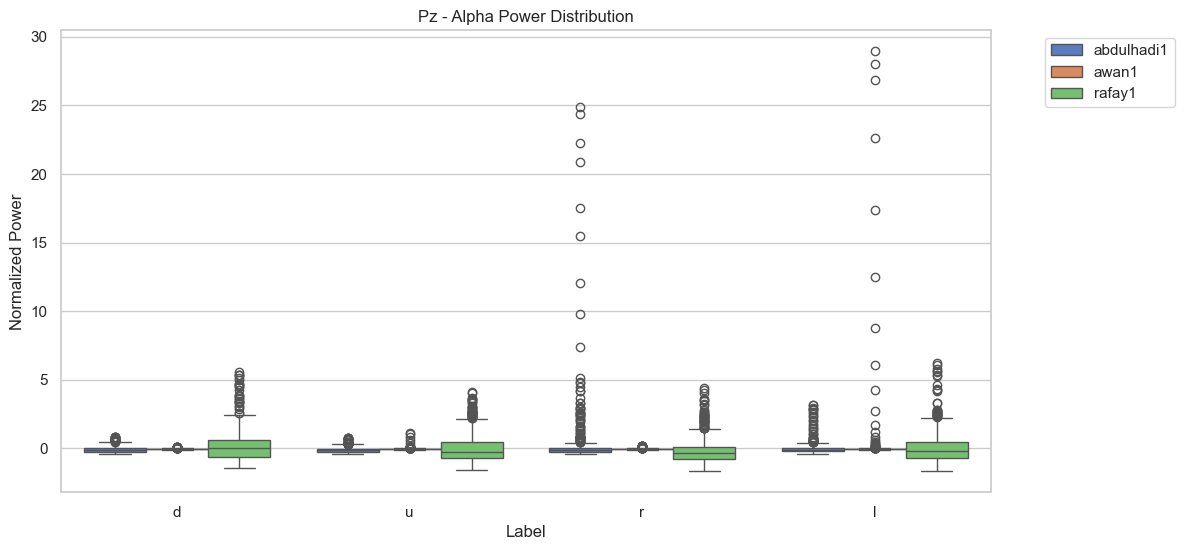

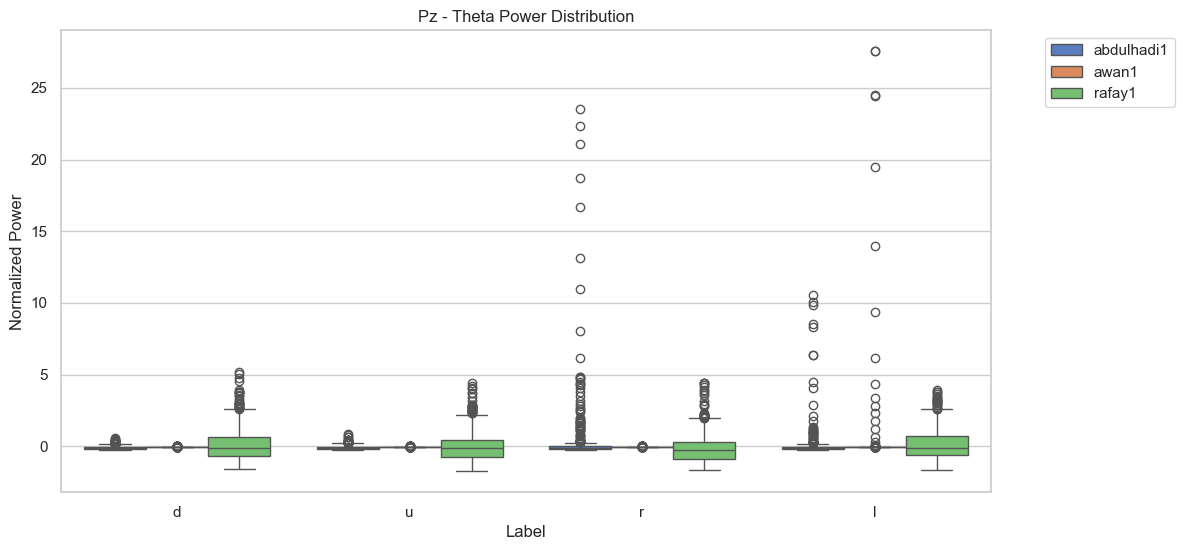

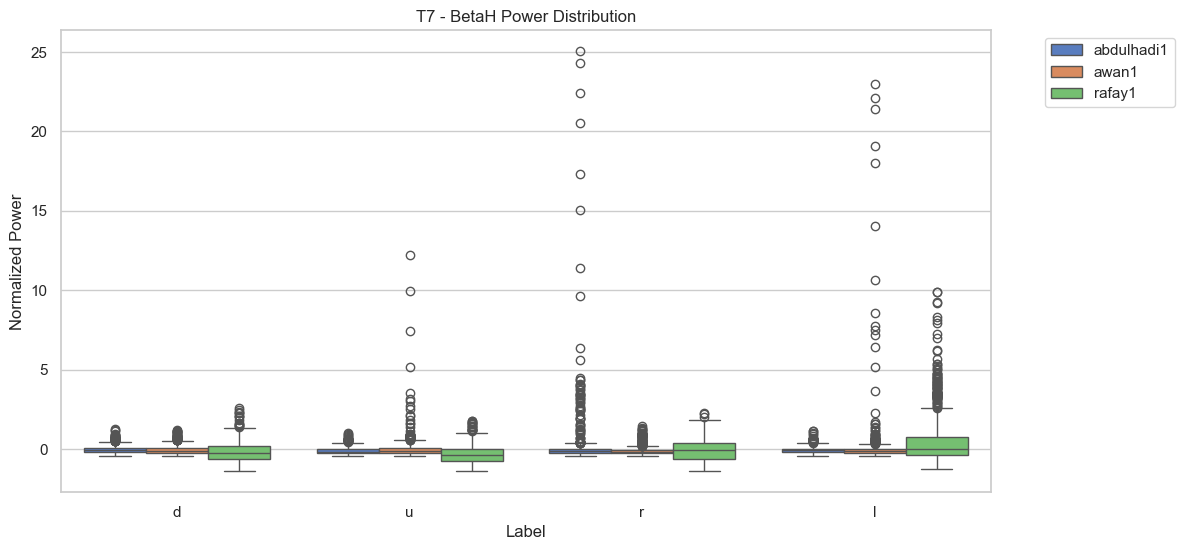

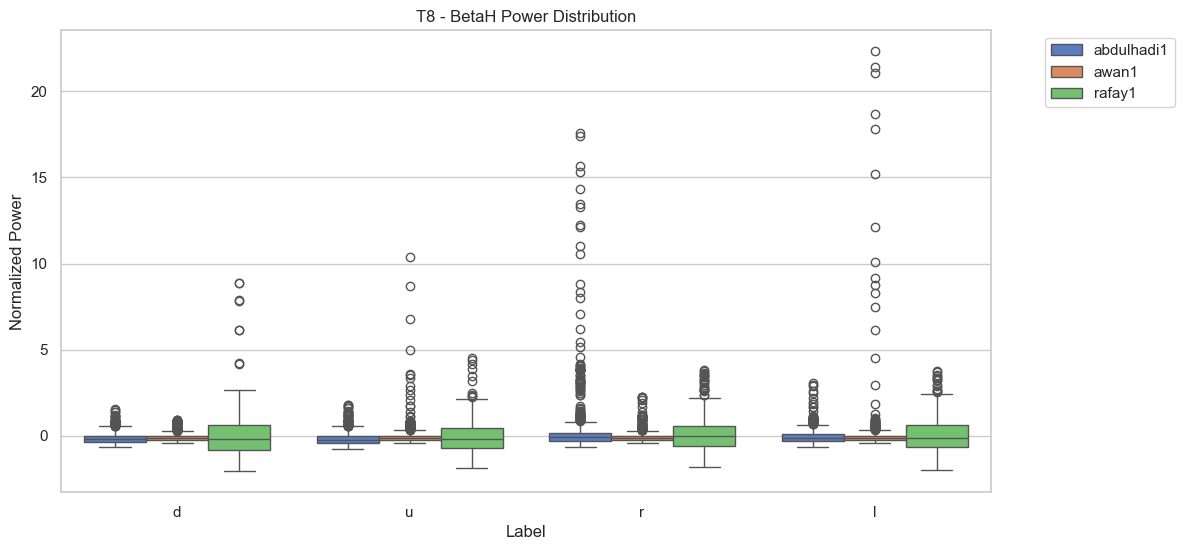

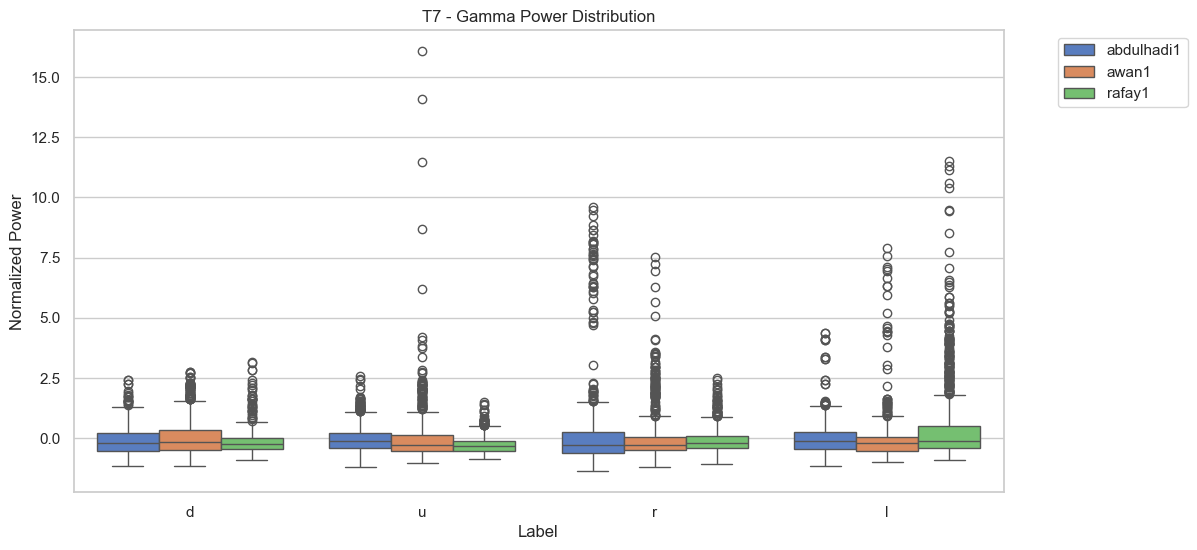

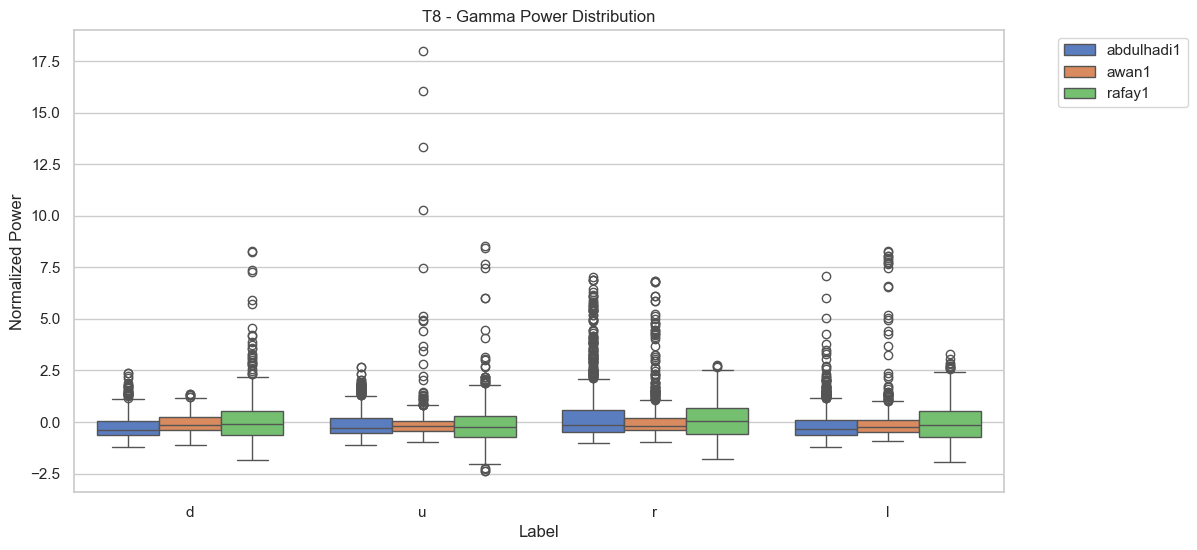

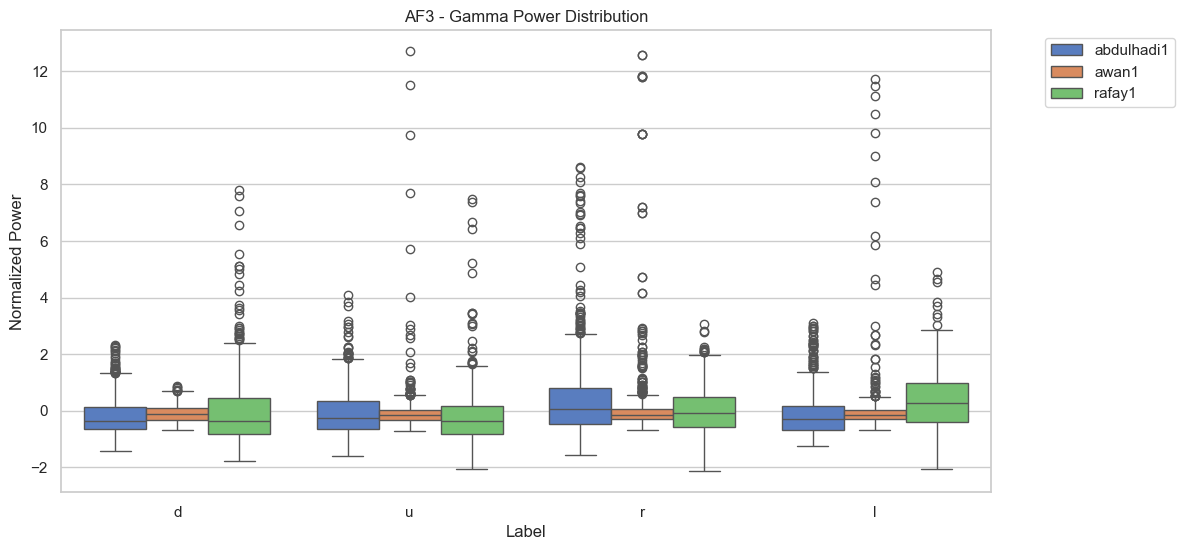

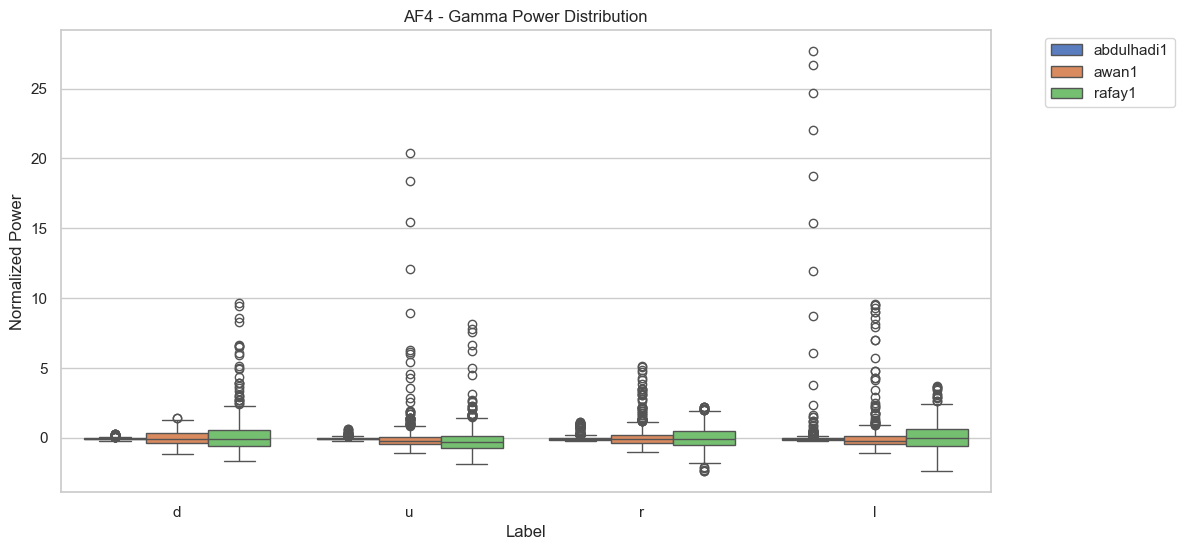

"This code snippet performs power band analysis on EEG data:\n\n1. **Identify Power Band Columns**: It collects all columns starting with 'POW.' which relate to power band metrics.\n\n2. **Handle Missing Data**:\n   - If no power band columns exist, it prints a message and skips analysis.\n   - Otherwise, it drops rows entirely NaN in power bands, or fills NaNs with 0.\n\n3. **Normalize Data**: \n   - It applies Z-score normalization to power band columns within each participant to standardize the data.\n\n4. **Plotting Function**: \n   - Defines `plot_power_comparison` to create boxplots of normalized power distribution for a specific electrode-band combination, distinguishing by label and participant.\n   - Example plots are generated for 'Pz-BetaH' and 'T8-Gamma' power distributions.\n\nThis analysis helps visualize and compare power band distributions across different conditions and participants."

In [ ]:
# ## 4. Power Band Analysis

# %%
# 4.1. Identify all power band columns
power_bands = [c for c in full_df.columns if c.startswith('POW.')]

# If there are no power band columns, skip
if not power_bands:
    print("No power band columns found. Skipping power band analysis.")
else:
    # Fill or drop NaNs for these columns. One option is to drop rows that are entirely NaN in power bands:
    full_df.dropna(subset=power_bands, how='all', inplace=True)
    
    # Alternatively, fill missing with 0 or some strategy
    full_df[power_bands] = full_df[power_bands].fillna(0)
    
    # 4.2. Normalize power bands within each participant (Z-score)
    full_df[power_bands] = (
        full_df
        .groupby('Participant')[power_bands]
        .transform(lambda x: (x - x.mean()) / x.std(ddof=1))
    )

    # Function to boxplot a given (electrode, band)
    def plot_power_comparison(electrode='AF3', band='Alpha'):
        col = f'POW.{electrode}.{band}'
        if col not in full_df.columns:
            print(f"Column {col} not found.")
            return
        
        plt.figure(figsize=(12,6))
        sns.boxplot(x='Label', y=col, hue='Participant', data=full_df)
        plt.title(f'{electrode} - {band} Power Distribution')
        plt.ylabel('Normalized Power')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    

    # electrodes = ['AF3', 'T7', 'Pz', 'T8', 'AF4']
    # bands = ['Theta', 'Alpha', 'BetaL', 'BetaH', 'Gamma']

            
    plot_power_comparison('Pz', 'Alpha')
#   – Reading (r)  
#   • Parietal-Alpha is often associated with visual processing, attention, and cognitive load. When reading, you may see consistent α-band modulations here.  
   
    plot_power_comparison('Pz', 'Theta')
#     (Pz, Theta) – Reading (r)  
#    • Parietal-Theta can reflect increased cognitive effort, working memory load, or attention. Reading tasks sometimes show elevated Θ in parietal regions, making this a good candidate for comparison.

    plot_power_comparison('T7', 'BetaH')
    plot_power_comparison('T8', 'BetaH')
#   – Left–Right movement (l)  
#    • Temporal/Beta often reflects motor activity or muscle artifacts related to lateral (side-to-side) movements. You can check whether BetaH power increases in T7 (left hemisphere) or T8 (right hemisphere) during left–right head turns.


    plot_power_comparison('T7', 'Gamma')
    plot_power_comparison('T8', 'Gamma')
#   – Left–Right movement (l) or strong motor engagement  
#    • Gamma band (>30 Hz) is sometimes linked with muscle activation, motor processing, or sensorimotor integration. If you suspect higher-frequency changes during lateral head movement, these might be visible at T7/T8 in Gamma.
    
    plot_power_comparison('AF3', 'Gamma')
    plot_power_comparison('AF4', 'Gamma')
#     – Up/Down movement (d, u)  
#    • Frontal Beta can reflect motor planning and motor control. Head tilt up/down could show BetaH changes in frontal electrodes (AF3/AF4), particularly if there’s muscle tension or forehead-based movement.
    
'''
powerband analysis

• Theta (≈ 4–7 Hz)
  – Often linked to drowsiness, reduced alertness, or more “internal” cognitive modes like memory encoding and retrieval. 
  – Near parietal or frontal locations, increased theta can sometimes indicate enhanced working memory load or sustained attention requirements.

• Alpha (≈ 8–12 Hz)
  – Often called the “idling” rhythm, associated with relaxed wakefulness, especially prominent when the eyes are closed.
  – In parietal or occipital regions, alpha is linked to visual processing, attention, and cognitive load. Changes in parietal alpha are sometimes observed during reading, mental imagery, or attentional tasks.

• BetaL / BetaH (Low Beta ≈ 13–20 Hz, High Beta ≈ 20–30 Hz)
  – Beta rhythms are associated with active thinking, concentration, problem solving, and sometimes motor (muscle) activity.
  – Splitting beta into low (BetaL) and high (BetaH) can help tease out different influences (e.g., cognitive focus vs. muscle tension).
  – In frontal or temporal areas, beta activity can increase with motor planning or muscle artifacts (e.g., especially high beta during movement tasks).

• Gamma (> 30 Hz)
  – Higher-frequency activity linked to a range of processes (e.g., sensory integration, conscious perception, motor activity).
  – Gamma can also be more prone to muscle/motion artifacts, because rapid muscle contractions generate high-frequency signals on the scalp.
  – In T7/T8, gamma can sometimes reflect strong muscle engagement (e.g., lateral jaw or neck tension). In frontal electrodes (AF3/AF4), it may reflect brow/forehead muscle tension or other cognitive processes
  
  
  electrodes
  
  • AF3 & AF4 (Frontal Electrodes)
  – Located on the anterior frontal (AF) region, left (AF3) and right (AF4).
  – Closely tied to frontal-lobe functions: executive processes, attention, and motor planning.
  – Muscle artifacts from forehead tension (e.g., frowning or facial expressions) can appear here, especially in higher-frequency bands (beta, gamma).
  – In movement-based tasks (e.g., head tilt, up/down movement), frontal electrodes might show changes related to motor planning or muscle tension.

• T7 & T8 (Temporal Electrodes)
  – Located on the left (T7) and right (T8) temporal areas.
  – Commonly pick up activity associated with auditory processing, language functions, and (when used in extended montages) facial muscle artifacts.
  – In movement-based tasks, T7/T8 can reflect lateral (left–right) muscle activation in scalp or neck muscles. High-frequency power (beta, gamma) often increases with muscle tension.
  – These locations may be used to detect lateralized activity, i.e., whether the left or right hemisphere is more engaged during certain motor or cognitive tasks.

• Pz (Parietal Electrode)
  – Near the midline of the parietal lobe.
  – Parietal areas are linked to sensory integration, visuospatial processing, attention, and aspects of working memory.
  – Alpha and theta activity in the parietal region are often studied for cognitive load, attention, or mental imagery. Reading tasks can modulate alpha in parietal sites (sometimes called “parietal alpha”).'''


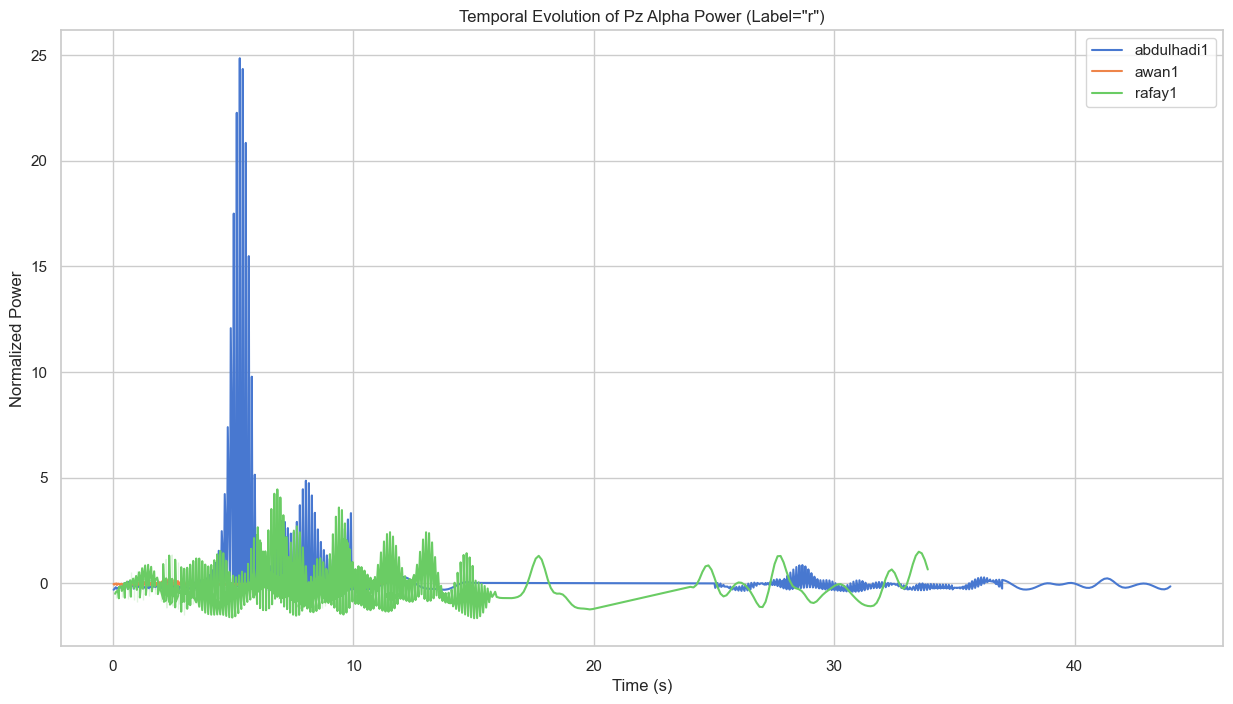

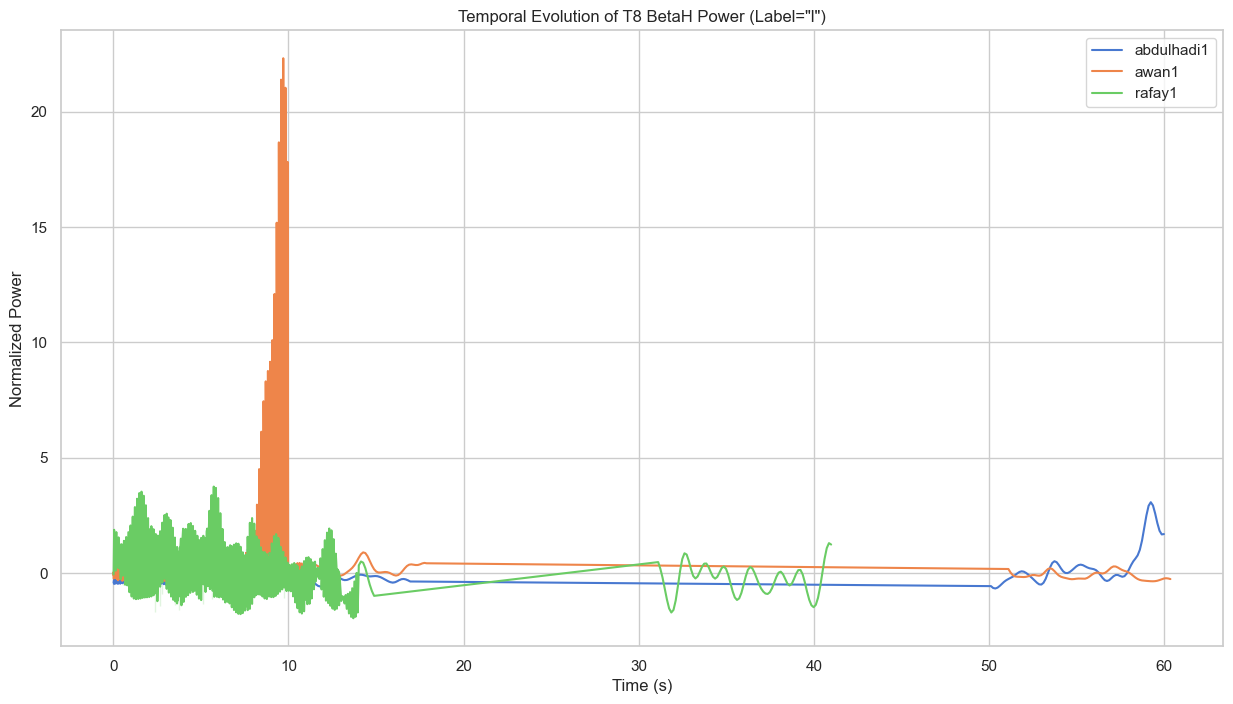

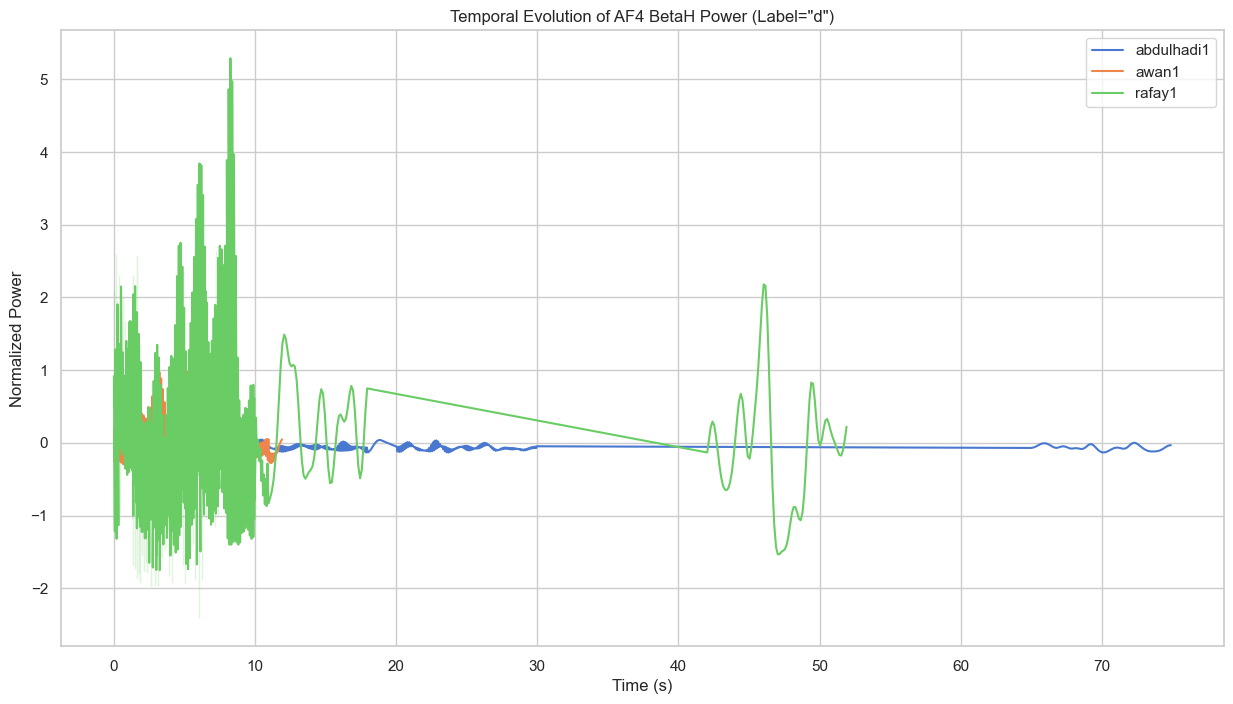

"This code snippet defines and uses a function to analyze the temporal dynamics of EEG power bands:\n\n1. **Function Definition (`plot_temporal_evolution`)**:\n   - **Purpose**: To plot the time evolution of power in a specified electrode and band for a given label across all participants.\n   - **Parameters**: Accepts a `label`, `electrode`, and `band` to specify the data being visualized.\n\n2. **Column Check**: \n   - Validates that the specified power band column (e.g., `POW.AF4.Alpha`) exists in the DataFrame.\n\n3. **Data Filtering**:\n   - Filters the dataset to include only rows for the specified `label`.\n   - Checks for an empty subset or missing 'RelativeTimestamp', and skips plotting if either condition is met.\n\n4. **Plotting**:\n   - Uses a line plot to depict the average time course of normalized power, with each line representing a different participant for the specified label.\n   - The plot shows mean ± standard deviation (captured by the `errorbar='sd'` parameter) t

In [22]:
# ## 5. Temporal Dynamics

# %%
def plot_temporal_evolution(label='r', electrode='AF4', band='Alpha'):
    """
    Plots the time course of a specified electrode-band for a given label,
    across all participants. If multiple trials exist, lineplot will show
    mean ± std by default. 
    """
    col = f'POW.{electrode}.{band}'
    if col not in full_df.columns:
        print(f"Column {col} not found in DataFrame.")
        return
    
    # Filter only relevant rows
    subset = full_df[(full_df['Label'] == label)]
    if subset.empty:
        print(f"No data for label='{label}'.")
        return
    
    # If 'RelativeTimestamp' not present, skip
    if 'RelativeTimestamp' not in subset.columns:
        print("No 'RelativeTimestamp' column found.")
        return
    
    plt.figure(figsize=(15,8))
    
    # We can hue by Participant or by Trial or both:
    sns.lineplot(
        x='RelativeTimestamp', 
        y=col,
        hue='Participant',
        data=subset,
        errorbar='sd'
    )
    
    plt.title(f'Temporal Evolution of {electrode} {band} Power (Label="{label}")')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Power')
    plt.legend()
    plt.show()

# Example usage
if power_bands:
    # plot_temporal_evolution('d', 'T7', 'BetaL')
    # plot_temporal_evolution('r', 'AF3', 'Gamma')
    plot_temporal_evolution('r', 'Pz', 'Alpha')
#     Reading (r) with Pz–Alpha or Pz–Theta  
#    • Why: The parietal region (Pz) often shows distinct alpha/theta dynamics during reading or attentional tasks. Temporal line plots could reveal how parietal alpha activity rises/falls as a participant maintains or shifts focus while reading.  
    
    plot_temporal_evolution('l', 'T8', 'BetaH')
#     Left–Right Movement (l) with T7 or T8–BetaH/Gamma  
#    • Why: Temporal (T7, T8) electrodes may capture motor-related or muscle artifact signals when the head moves side-to-side. Higher frequency bands (BetaH, Gamma) often change more visibly with movement.  
    
    plot_temporal_evolution('d', 'AF4', 'BetaH')
#     Up/Down Movement (u, d) with AF3/AF4–BetaH  
#    • Why: Frontal electrodes (AF3, AF4) may reflect motor planning or subtle muscle tension in the forehead when looking up/down. Beta (especially high Beta) is frequently associated with motor engagement.  
    
    
'''This code snippet defines and uses a function to analyze the temporal dynamics of EEG power bands:

1. **Function Definition (`plot_temporal_evolution`)**:
   - **Purpose**: To plot the time evolution of power in a specified electrode and band for a given label across all participants.
   - **Parameters**: Accepts a `label`, `electrode`, and `band` to specify the data being visualized.

2. **Column Check**: 
   - Validates that the specified power band column (e.g., `POW.AF4.Alpha`) exists in the DataFrame.

3. **Data Filtering**:
   - Filters the dataset to include only rows for the specified `label`.
   - Checks for an empty subset or missing 'RelativeTimestamp', and skips plotting if either condition is met.

4. **Plotting**:
   - Uses a line plot to depict the average time course of normalized power, with each line representing a different participant for the specified label.
   - The plot shows mean ± standard deviation (captured by the `errorbar='sd'` parameter) to indicate variability around the mean.

5. **Example Usage**:
   - Calls the function to plot temporal evolution for specific label-electrode-band combinations (e.g., 'd-T7-BetaL' and 'r-AF3-Gamma'), visualizing how power changes over time.

This function provides insight into how power band dynamics change over time for specific cognitive or motor tasks, potentially revealing task-specific patterns.'''


In [ ]:
'''From these plots, you can see that each participant’s EEG power evolves differently over time—even for the same task and electrode/band:

• One participant often shows a large spike or greater overall amplitude than the others, suggesting individual differences (e.g., stronger alpha or beta bursts) or possible artifacts.  
• After about 10–15 seconds, the signals tend to settle closer to baseline for most participants, indicating that the transient peaks might be an initial response (e.g., task onset, movement artifact) that tapers off.  
• The variation between participants (different colored lines) is sometimes bigger than the variation within a given person’s trial, reflecting that each individual’s EEG response profile and noise can be quite distinct.  

Overall, these temporal‐evolution plots underscore that although all participants are doing the same task, their EEG “signatures” can differ in magnitude and timing. They also show that short, intense bursts 
(like the big orange peak in the second figure) might be movement‐related or attention‐related transients that dominate the signal early in the recording.'''

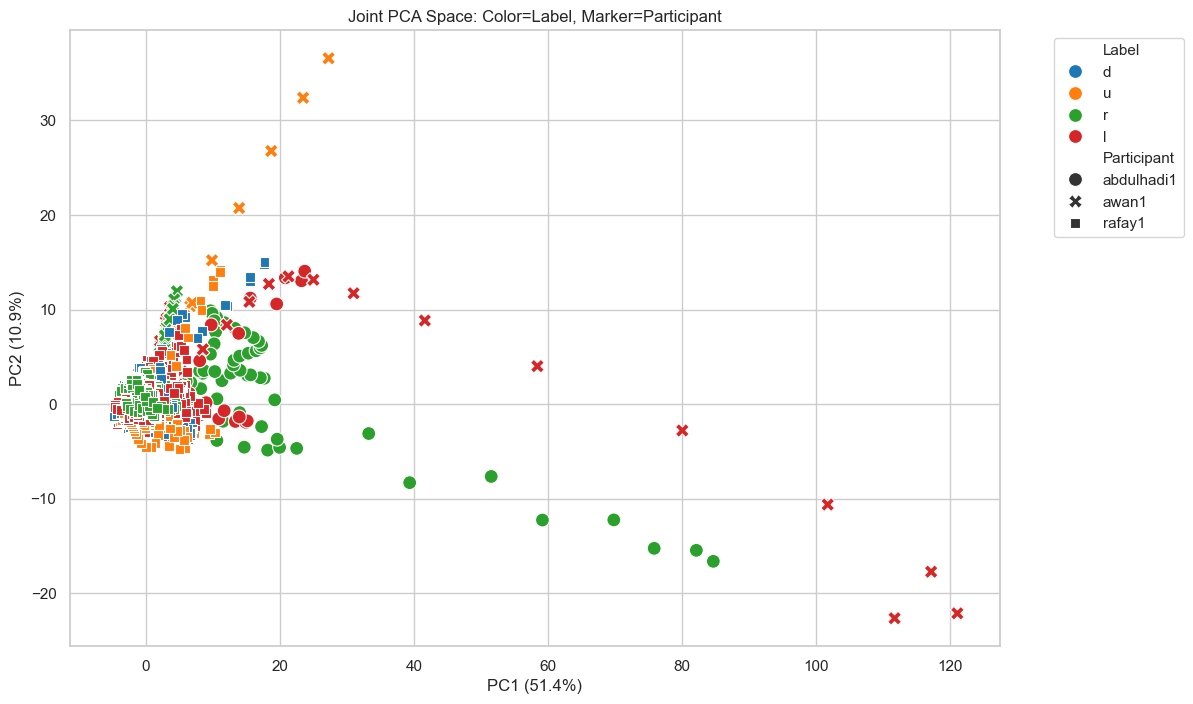

"This code snippet performs a Principal Component Analysis (PCA) to evaluate cross-participant consistency in EEG power band data:\n\n1. **Check for Power Bands**: \n   - Proceeds with PCA only if power band columns exist in the data.\n\n2. **Data Preparation**:\n   - Drops any rows from `full_df` that are entirely NaN in power band columns, ensuring valid data for PCA.\n\n3. **Standardize Data**:\n   - Uses `StandardScaler` to normalize the power band features to have zero mean and unit variance, which is a common preprocessing step for PCA.\n\n4. **Apply PCA**:\n   - Performs PCA to reduce the dimensionality of the normalized power band data to two principal components.\n\n5. **Visualization**:\n   - Creates a 2D scatter plot of the first two principal components.\n   - Color-codes points by 'Label' and styles them by 'Participant', allowing visualization of both categorical variables on the same plot.\n   - Labels the axes with the percentage of variance explained by each principal 

In [23]:
# ## 6. Cross-Participant Consistency (PCA)

# %%
if power_bands:
    def plot_joint_pca():
        # Drop any rows that are entirely NaN in power bands (should be none if we filled, but just in case).
        df_pca = full_df.dropna(subset=power_bands)
        if df_pca.empty:
            print("No rows with valid power band data for PCA.")
            return
        
        # Scale (0-mean, unit variance)
        scaler = StandardScaler()
        X = scaler.fit_transform(df_pca[power_bands])
        
        # PCA in 2D
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(X)
        
        plt.figure(figsize=(12,8))
        sns.scatterplot(
            x=principal_components[:, 0],
            y=principal_components[:, 1],
            hue=df_pca['Label'].astype(str),
            style=df_pca['Participant'].astype(str),
            palette='tab10',
            s=100
        )
        var1 = pca.explained_variance_ratio_[0]*100
        var2 = pca.explained_variance_ratio_[1]*100
        plt.title('Joint PCA Space: Color=Label, Marker=Participant')
        plt.xlabel(f'PC1 ({var1:.1f}%)')
        plt.ylabel(f'PC2 ({var2:.1f}%)')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    
    plot_joint_pca()

'''This code snippet performs a Principal Component Analysis (PCA) to evaluate cross-participant consistency in EEG power band data:

1. **Check for Power Bands**: 
   - Proceeds with PCA only if power band columns exist in the data.

2. **Data Preparation**:
   - Drops any rows from `full_df` that are entirely NaN in power band columns, ensuring valid data for PCA.

3. **Standardize Data**:
   - Uses `StandardScaler` to normalize the power band features to have zero mean and unit variance, which is a common preprocessing step for PCA.

4. **Apply PCA**:
   - Performs PCA to reduce the dimensionality of the normalized power band data to two principal components.

5. **Visualization**:
   - Creates a 2D scatter plot of the first two principal components.
   - Color-codes points by 'Label' and styles them by 'Participant', allowing visualization of both categorical variables on the same plot.
   - Labels the axes with the percentage of variance explained by each principal component (PC1 and PC2).

6. **Output**:
   - Displays the scatter plot, which helps assess whether data from different labels or participants cluster together or overlap, indicating potential consistency or variance among participants and conditions.

This PCA visualization aids in understanding how EEG features from different subjects and tasks compare in a reduced-dimension space, helping identify patterns or distinctions in power band data.'''

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Suppose your "Label" column has the four tasks: d, u, r, l
# and power_bands is the list of POW.* columns
if power_bands and 'Label' in full_df.columns:
    # 1. Prepare X (features) and y (labels)
    X = full_df[power_bands].fillna(0)  # or dropna, depending on your preference
    y = full_df['Label']

    # 2. Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2,  # 20% of data for testing
        random_state=42,
        stratify=y  # keeps label distribution consistent
    )

    # 3. Train a simple RandomForest
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # 4. Evaluate
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
else:
    print("Classification not run: ensure power_bands and 'Label' are present.")
    
    
'''Notes on Classification:
• Independence Assumption: EEG samples adjacent in time are often highly correlated and not truly independent. A more EEG-specific approach is to compute features per trial (e.g., trial-averaged power or 
time-frequency features), then classify trials instead of raw samples.  
• Feature Selection/Engineering: Simple power bands may not be enough—researchers often compute time-frequency decompositions, wavelet transforms, or topographical features.  
• Cross-Participant vs. Within-Participant: Decide whether you are training a model per participant or a single “general” model across participants. If across participants, you may want to include “
Participant” as a factor or try cross-subject normalization and advanced domain-adaptation methods.
If your goal is to see whether EEG signals can distinguish between your four tasks (down, up, reading, left-right), try a simple classification approach. Below is a minimal example using scikit-learn. 
It treats each row (i.e., each time point) as an individual sample, which is not always ideal for EEG (see note below), but it illustrates the process:


Those are excellent classification metrics—F1-scores of around 0.95 to 0.97 across all labels indicate that your model is performing very well at distinguishing among the four tasks (down, up, reading, left-right). Here are some key points and considerations:

• High Precision & Recall:  
  – Precision (∼0.94–0.97) means that when the model predicts a particular label, it’s usually correct.  
  – Recall (∼0.94–0.98) means it’s also catching most or nearly all instances of that label.  
  – In EEG or similar real-time signals, this balance of high precision and recall is ideal, indicating your model is both accurate and robust.

• Consistent Performance Across Labels:  
  – All four labels (d, l, r, u) have similarly strong F1-scores, suggesting your model does not heavily favor one label over the others.  
  – This is good for experiments where each class is equally important.

• High Overall Accuracy (95%):  
  – Across the entire test set, the model is correct 95% of the time.  
  – Because all classes seem to have near-equal support (about 520 data points each), you can be more confident this isn’t just due to class imbalance.
'''

              precision    recall  f1-score   support

           d       0.97      0.94      0.96       526
           l       0.94      0.95      0.95       527
           r       0.96      0.98      0.97       521
           u       0.94      0.95      0.94       520

    accuracy                           0.95      2094
   macro avg       0.95      0.95      0.95      2094
weighted avg       0.95      0.95      0.95      2094



In [ ]:
'''• The PCA plot (in 2D) shows that at first glance, the tasks (down, up, reading, left‐right) aren’t nicely separated—there’s overlap among their points.  
• However, the Random Forest classifier, which uses all the available power‐band features rather than just two principal components, achieves high accuracy (around 95%) when distinguishing the four tasks.  
• In other words, while the top two principal components don’t fully separate the labels, the full feature set appears to provide enough information for a model like Random Forest to accurately classify the tasks.'''